# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Q1:(1)
df = pd.read_csv("scratchpad/data/airbnb_NYC.csv", encoding="latin1")
#df.head()

#price colum was cleaned by removing commas and converting it to numeric values, with invalid entries set to NaN.
df["Price"] = df["Price"].astype(str).str.replace(",", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

#checks for missing values in price column/sums them up
df["Price"].isna().sum()

0

I changed price column to a str to ensure that str replacement methods would work correctly. Then used str.replace() to remove commas from the price values. After cleaning the values, I converted the column back to a numeric type using pd.to_numeric() with errors="coerce", which converts any values that cannot be parsed into numbers into NaN. After this process, there are 0 missing values in the price column.

In [ ]:
#Q1:(2)
df_cop = pd.read_csv("scratchpad/data/mn_police_use_of_force.csv", encoding="latin1")
#df_cop.head()

#replace Y w/Yes & N with No in subject_injury column
df_cop["subject_injury"] = df_cop["subject_injury"].replace({"Y":"Yes", "N":"No"})

#get proportion of values missing b4 chnges
prop_missing = df_cop["subject_injury"].isna().mean()
print(prop_missing)

0.7619342359767892


This proportion means that about 76.19% of the observations do not contain recorded injury information.

In [ ]:
#create new clmn to fill missing values with Missing instead of having NaN
df_cop["subject_injury_clean"] = df_cop["subject_injury"].fillna("Missing")
cross_tab = pd.crosstab(df_cop["force_type"], df_cop["subject_injury_clean"])
cross_tab

subject_injury_clean,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


In [ ]:
#Q1:(3)
df_meta = pd.read_csv("scratchpad/data/metabric.csv", encoding="latin1")
#df_meta.head()

#map overall survival status to numerical dummy values, 0 for deceased and 1 for living
df_meta["Survival_Dummy"] = df_meta["Overall Survival Status"].map({
    "0:LIVING": 1,
    "1:DECEASED": 0
})

#check if mapping was successful
df_meta[["Overall Survival Status", "Survival_Dummy"]].head()

,Overall Survival Status,Survival_Dummy
0,0:LIVING,1
1,1:DECEASED,0
2,0:LIVING,1
3,1:DECEASED,0
4,1:DECEASED,0


In [ ]:
#load airbnb_NYC df again and check for nan in review scores rating column
df = pd.read_csv("scratchpad/data/airbnb_NYC.csv", encoding="latin1")
df["Review Scores Rating"].isna().sum()

8323

There are 8323 nan values in review scores rating clmn.

In [ ]:
#calculating the median of the Review Scores Rating column, ignoring NaN values
median_rating = df["Review Scores Rating"].median()
median_rating

94.0

Median of the review scores rating column is 94.0.

In [ ]:
#creating a new column where missing values in Review Scores Rating are imputed with the median value
df["Review Scores Rating Imputed"] = df["Review Scores Rating"].fillna(median_rating)

In [ ]:
#checking for missing values in the new imputed column, it should be 0
df["Review Scores Rating Imputed"].isna().sum()

0

Assigning nan values with the median can distort the data by creating an artificial spike at the median, which may misrepresent the true distribution and lead to misleading results.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
pip install xlrd>=1.0.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Q2:(1)
df = pd.read_excel("scratchpad/data/GSAF5.xls")
#df.head()

We needed to load the dataset using pd.read_excel() instead of pd.read_csv() because the file is in Excel format.

In [ ]:
df_columns = df.columns.astype(str).str.strip()
df_cleaned = df.dropna(axis=1, how="all")
#df_cleaned.head()

An observation represents one shark attack incident recorded in a single row. Each observation is analyzed as a complete case, so removing rows with missing values would eliminate entire incidents and could bias the results.

In [ ]:
# clean the yr column by converting it to numeric values, coercing errors to nan, and then dropping rows with nan values
df_cleaned["Year"] = pd.to_numeric(df_cleaned["Year"], errors="coerce")
df_cleaned = df_cleaned.dropna(subset=["Year"])
df_cleaned["Year"] = df_cleaned["Year"].astype(int)

In [ ]:
# describe range of values in year clmn
print("Year range:", df_cleaned["Year"].min(), "to", df_cleaned["Year"].max())

Year range: 0 to 2026


In [ ]:
# filter rows since 1940
attacks_1940 = df_cleaned[df_cleaned["Year"] >= 1940]

In [ ]:
# count attacks per year since 1940
attacks_per_year = attacks_1940["Year"].value_counts().sort_index()

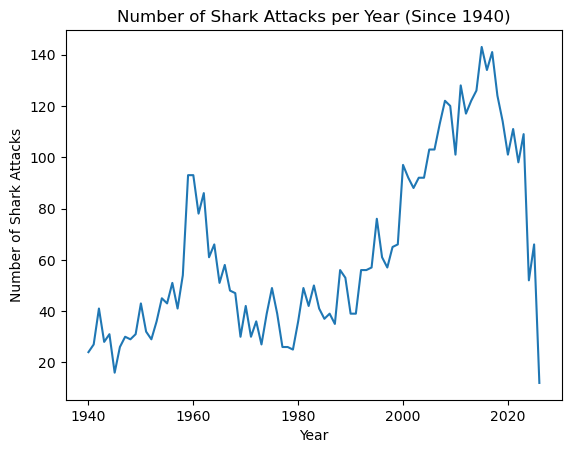

In [ ]:
# plot attacks over time
attacks_per_year.plot()

plt.title("Number of Shark Attacks per Year (Since 1940)")
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")

plt.show()

Overall, the attacks increase over time, but there is a steep decline in shark attacks beginning 2015.

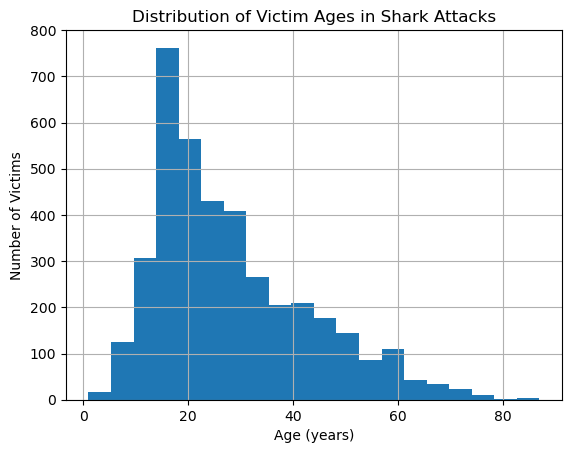

In [ ]:
#Q2(2)
# Clean age clmn by converting to numeric values then coercing errors to nan
df_cleaned["Age"] = pd.to_numeric(df_cleaned["Age"], errors="coerce")

# Plot histogram
df_cleaned["Age"].hist(bins=20)

plt.title("Distribution of Victim Ages in Shark Attacks")
plt.xlabel("Age (years)")
plt.ylabel("Number of Victims")
plt.show()

In [ ]:
# Q2(3)
# clean type variable
temp = (df_cleaned["Type"].astype(str).str.strip().str.lower())

df_cleaned["Type_clean"] = np.select([temp.str.contains("unprovoked", na=False),temp.str.contains("provoked", na=False)],
    ["Unprovoked","Provoked"],default="Unknown")

In [ ]:
# proportion unprovoked among known attacks
known = df_cleaned["Type_clean"].isin(["Unprovoked", "Provoked"])
proportion_unprovoked = (df_cleaned.loc[known, "Type_clean"] == "Unprovoked").mean()
print("Unprovoked Attacks Out Of The Known Attack Types Are:", proportion_unprovoked)

Unprovoked Attacks Out Of The Known Attack Types Are: 0.8902709149769978


In [ ]:
# proportion unprovoked including unknowns
proportion_unprovoked_overall = (df_cleaned["Type_clean"] == "Unprovoked").mean()
print("Unprovoked Attacks Out Of The Unknown Attack Types Are:", proportion_unprovoked_overall)

Unprovoked Attacks Out Of The Unknown Attack Types Are: 0.738829185520362


Among cases where the attack type is known, nearly 89% of incidents are classified as unprovoked (0.8903). However, when attacks labeled as “unknown” are included in the denominator, the share of unprovoked cases drops to about 74% (0.7388). This difference highlights how the inclusion of unknown classifications affects the overall proportion.

In [ ]:
#Q2(4)

# display distribution of original fatal y/n values and count missing entries
print(df["Fatal Y/N"].value_counts(dropna=False))
print("missing values:", df["Fatal Y/N"].isna().sum())

# standardize fatal y/n into three categories: y, n, unknown
def tidy_fatal_status(val):
    # treat actual missing values first
    if pd.isna(val):
        return "Unknown"
    # normalize formatting
    val_clean = str(val).strip().lower()
    # map values to tidy categories
    if val_clean in ["unknown", "nan", ""]:
        return "Unknown"
    if val_clean.startswith("y") or val_clean == "f":
        return "Y"
    if val_clean.startswith("n"):
        return "N"
    # default fallback
    return "Unknown"
df["Fatal_tidy"] = df["Fatal Y/N"].apply(tidy_fatal_status)
# show cleaned distribution
print(df["Fatal_tidy"].value_counts())

N          4933
Y          1488
NaN         561
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: Fatal Y/N, dtype: int64
missing values: 561
N          4943
Y          1495
Unknown     636
Name: Fatal_tidy, dtype: int64


In [ ]:
# make sure fatal_clean exists in df_cleaned

def cleaning_fatal(x):
    # if value is missing, label as unknown
    if pd.isna(x):
        return "Unknown"

    # clean up formatting first
    x = str(x).strip().lower()

    # handle obvious unknown labels
    if x in ["unknown", "nan", ""]:
        return "Unknown"

    # check for yes/fatal indicators
    if x.startswith("y") or x == "f":
        return "Y"

    # check for no indicators
    if x.startswith("n"):
        return "N"

    # anything else just default to unknown
    return "Unknown"

# apply cleaning function
df_cleaned["Fatal_clean"] = df_cleaned["Fatal Y/N"].apply(cleaning_fatal)

# only keep rows where type is provoked/unprovoked and fatal is y or n
sub = df_cleaned[
    (df_cleaned["Type_clean"].isin(["Provoked", "Unprovoked"])) &
    (df_cleaned["Fatal_clean"].isin(["Y", "N"]))
].copy()

# convert fatal status into numeric form (1 = fatal, 0 = not fatal)
sub["Fatal_binary"] = sub["Fatal_clean"].replace({"Y": 1, "N": 0})

# calculate fatality rate within each attack type
fatal_rate = sub.groupby("Type_clean")["Fatal_binary"].mean()

print("fatality rate by attack type:")
print(fatal_rate)

print("\ncounts:")
print(pd.crosstab(sub["Type_clean"], sub["Fatal_clean"]))

print("\nrow proportions (within each type):")
print(pd.crosstab(sub["Type_clean"], sub["Fatal_clean"], normalize="index"))

fatality rate by attack type:
Type_clean
Provoked      0.033071
Unprovoked    0.246602
Name: Fatal_binary, dtype: float64

counts:
Fatal_clean     N     Y
Type_clean             
Provoked      614    21
Unprovoked   3880  1270

row proportions (within each type):
Fatal_clean         N         Y
Type_clean                     
Provoked     0.966929  0.033071
Unprovoked   0.753398  0.246602


Unprovoked attacks appear to have a higher death rate; perhaps because victims are not expecting the attack and may not have time to react or defend themselves.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. The paper focuses on how the structure of a dataset affects the entire data analysis process, and argues that organizing data in a consistent way makes analysis faster and more logical.

2. The tidy data standard is designed to reduce confusion in formatting so analysts can focus on interpreting results instead of constantly reshaping data for different tools.

3. The first quote means that tidy datasets follow a predictable structure, but messy datasets can be disorganized in many different and inconsistent ways. The second quote suggests that while it’s usually clear how rows and columns function within one dataset, defining those concepts universally is complicated because datasets vary widely in purpose and structure.

4. A value is an individual data point. A variable represents a single characteristic being measured across units. An observation represents all the information collected for one unit of analysis.

5. Tidy data is defined by aligning meaning with structure so that each column represents one variable, each row represents one observation, and each cell contains exactly one value.

6. The five common issues with messy data include mixing variables into column headers, combining multiple variables in one column, spreading variables across both rows and columns, combining different types of observational units in one table, and splitting a single unit across multiple tables. Table 4 is messy because what should be values are instead placed as separate columns, which makes analysis awkward. Melting corrects this by restructuring the dataset into a longer, more usable format.

7. Table 11 is messy because it spreads one conceptual variable across multiple columns, making the structure harder to interpret. Table 12 is tidy because the same information is reorganized so that each variable and observation is clearly separated, which makes the dataset easier to analyze.



**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

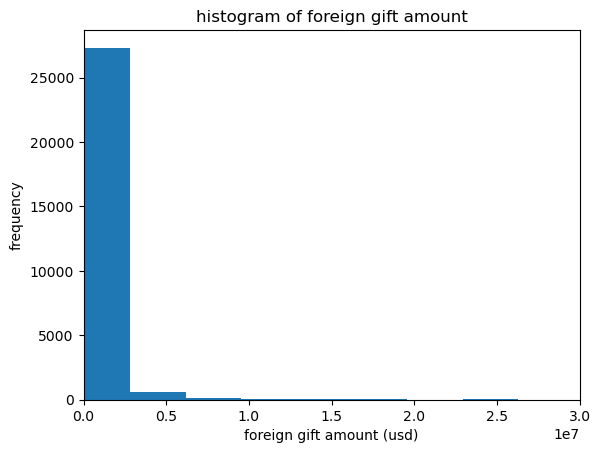

In [ ]:
#Q4(1)

# load dataset
df_gift = pd.read_csv("scratchpad/data/ForeignGifts_edu.csv", encoding="latin1")

# convert foreign gift amount to numeric just in case there are formatting issues
df_gift["Foreign Gift Amount"] = pd.to_numeric(
    df_gift["Foreign Gift Amount"], errors="coerce"
)

# drop missing values before plotting
amounts = df_gift["Foreign Gift Amount"].dropna()

# plot histogram
plt.figure()
plt.hist(amounts, bins=30)

plt.title("histogram of foreign gift amount")
plt.xlabel("foreign gift amount (usd)")
plt.ylabel("frequency")

# limit x-axis to better see bulk of distribution
plt.xlim(0, 3e7)

plt.show()

The distribution of foreign gift amounts is clearly right-skewed.
most gifts are relatively small in value, while a small number of extremely large
gifts stretch the distribution to the right. this creates a long tail and suggests
the presence of outliers at higher dollar amounts.

In [ ]:
# count each gift type
gift_type_counts = df_gift["Gift Type"].value_counts(dropna=False)

# calculate proportions
gift_type_props = gift_type_counts / gift_type_counts.sum()

print(gift_type_props)

Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: Gift Type, dtype: float64


Contracts make up the majority of foreign gifts, followed by monetary
gifts. real estate represents only a very small fraction of the total. this shows
that most foreign financial activity with universities happens through formal
contracts rather than direct property transfers.

In [ ]:
#Q4(2)

# group by country and count how many gifts each country gives
country_group = df_gift.groupby("Country of Giftor")

top_countries_count = (
    country_group.size()
    .sort_values(ascending=False)
    .iloc[:15]
)

print("top 15 countries by number of gifts:")
print(top_countries_count)


top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64


In [ ]:
# now calculate total dollar amount given by each country
top_countries_amount = (
    country_group["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .iloc[:15]
)

print("\ntop 15 countries by total amount given:")
print(top_countries_amount)


top 15 countries by total amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [ ]:
#Q4(3...):

# compute total foreign gift amount by institution
institution_totals = (
    df_gift.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
)

# get top 15 institutions
top_institutions = institution_totals.iloc[:15]

print("top 15 institutions by total foreign gift amount:")
print(top_institutions)

top 15 institutions by total foreign gift amount:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype:

The institutions receiving the highest total foreign funding include
several major research universities such as carnegie mellon, cornell, harvard,
mit, yale, and texas a&m. these schools appear to receive significantly larger
foreign contributions compared to most other institutions.

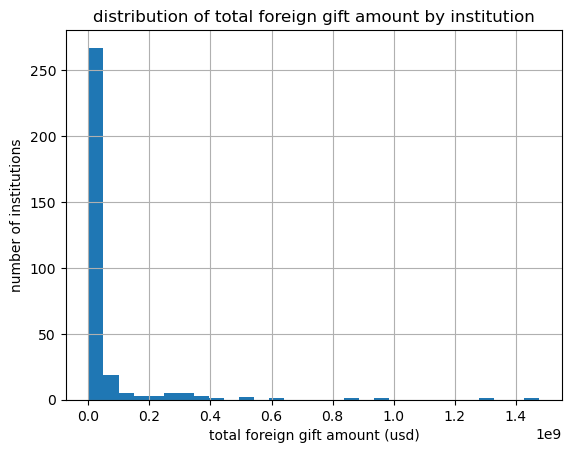

In [ ]:
# visualize distribution of total foreign funding across institutions
plt.figure()
institution_totals.hist(bins=30)

plt.title("distribution of total foreign gift amount by institution")
plt.xlabel("total foreign gift amount (usd)")
plt.ylabel("number of institutions")

plt.show()

In [ ]:
# compute total amount given by each giftor
giftor_totals = (
    df_gift.groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
)

In [ ]:
# top 10 giftors
top_giftors = giftor_totals.iloc[:10]

print("top 10 giftors by total contribution:")
print(top_giftors)

top 10 giftors by total contribution:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Name: Foreign Gift Amount, dtype: int64


The largest total contributions come from a small number of major
organizations. for example, the qatar foundation appears multiple times among
the top contributors, along with other large international institutions and
government-related organizations. this suggests foreign funding is concentrated
among a few major sources.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [ ]:
#Q5
df_college = pd.read_csv("scratchpad/data/college_completion.csv", encoding="latin1")

# quick check of the first few rows
df_college.head()

# printing dataset size
n_obs, n_vars = df_college.shape
print("observations:", n_obs)
print("variables:", n_vars)

observations: 3798
variables: 63


This dataset has 3798 observations and 63 variables, meaning there are 3798 rows
(each row is a school entry) and 63 columns (different attributes about the school).

In [ ]:
# crosstab of control vs level
ct_counts = pd.crosstab(df_college["control"], df_college["level"], dropna=False)

# row proportions to see the breakdown within each control category
ct_rowprops = ct_counts.div(ct_counts.sum(axis=1), axis=0)

print("crosstab counts (control x level):")
print(ct_counts)

print("\nrow proportions (within each control):")
print(ct_rowprops)

crosstab counts (control x level):
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632

row proportions (within each control):
level                     2-year    4-year
control                                   
Private for-profit      0.468750  0.531250
Private not-for-profit  0.054487  0.945513
Public                  0.594352  0.405648


Private not-for-profit schools are mostly 4-year institutions (about 94.55% are 4-year).
public schools lean more toward 2-year institutions (around 59.44% are 2-year). private for-profit
is more split between 2-year and 4-year (roughly 46.88% vs 53.12%). overall, it looks like private
not-for-profits are mainly focused on 4-year degrees, while public institutions provide a lot more
2-year options.

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


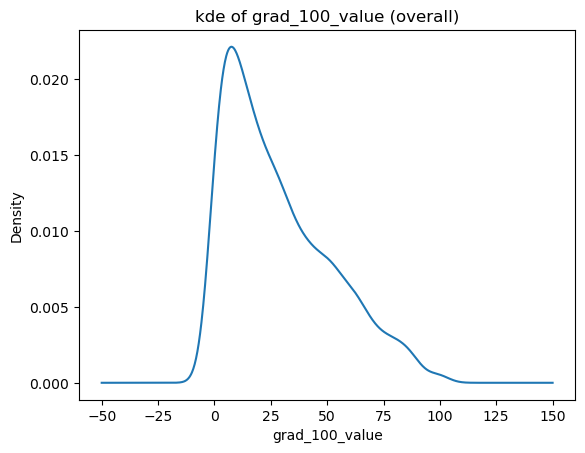

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


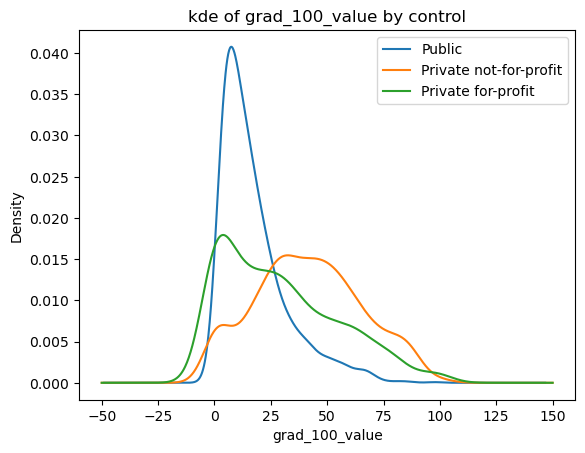

control
Private not-for-profit    41.0
Private for-profit        24.7
Public                    13.2
Name: grad_100_value, dtype: float64


In [ ]:
# Q5

# summary statistics for overall graduation rate
grad_series = df_college["grad_100_value"]

print(grad_series.describe())

# plot overall kde
plt.figure()
grad_series.dropna().plot(kind="kde")
plt.title("kde of grad_100_value (overall)")
plt.xlabel("grad_100_value")
plt.show()

# summary stats grouped by control type
grad_by_control = df_college.groupby("control")["grad_100_value"]

print(grad_by_control.describe())

# kde plot for each control category
plt.figure()
for ctrl_name in df_college["control"].dropna().unique():
    subset = df_college.loc[df_college["control"] == ctrl_name, "grad_100_value"]
    subset.dropna().plot(kind="kde", label=ctrl_name)

plt.title("kde of grad_100_value by control")
plt.xlabel("grad_100_value")
plt.legend()
plt.show()

# compare medians across control groups
median_vals = grad_by_control.median().sort_values(ascending=False)
print(median_vals)

Based on both the kde curves and the median values,
private not-for-profit institutions appear to have the highest
graduation rates overall. their distribution is shifted further
to the right compared to public and private for-profit schools,
which suggests more favorable outcomes.

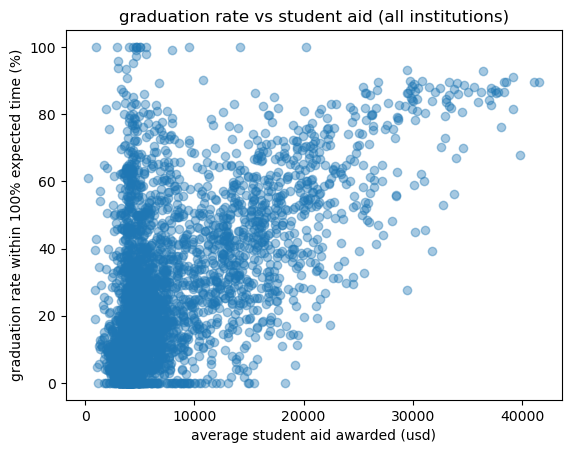

overall covariance: 88610.48316902436
overall correlation: 0.5758792845936076


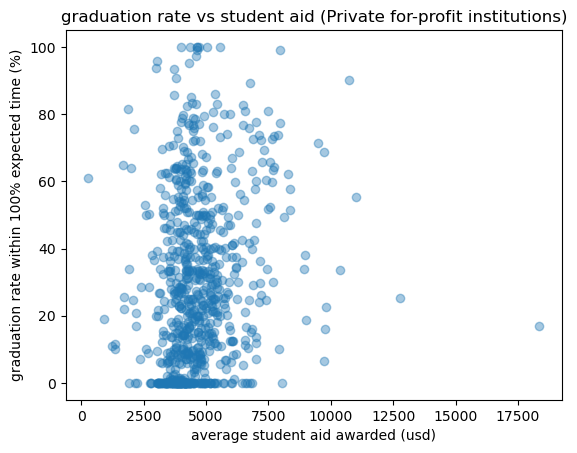

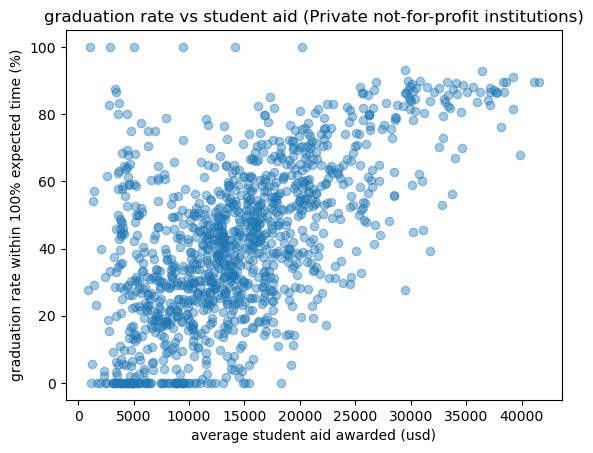

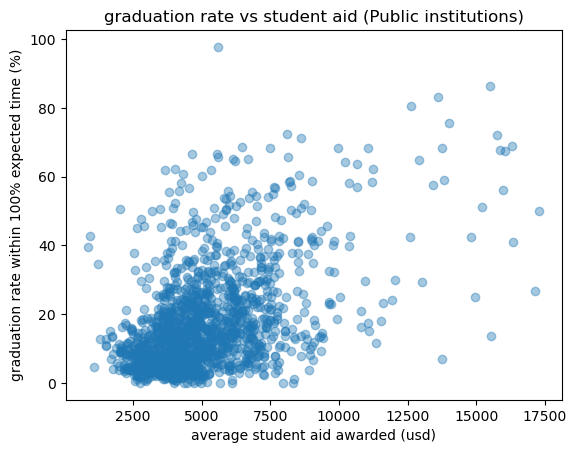

                  control     n  cov(aid,grad)  corr(aid,grad)
1  Private not-for-profit  1189  109274.123337        0.601591
2                  Public  1499   15355.146212        0.482481
0      Private for-profit   778    6897.524957        0.188363


In [ ]:
# Q5:

# make sure aid_value is numeric
df_college["aid_value"] = pd.to_numeric(df_college["aid_value"], errors="coerce")

# keep only the columns we need and drop rows missing either variable
sub = df_college.loc[:, ["aid_value", "grad_100_value", "control"]].dropna().copy()

# scatterplot for all institutions
plt.figure()
plt.scatter(sub["aid_value"], sub["grad_100_value"], alpha=0.4)
plt.xlabel("average student aid awarded (usd)")
plt.ylabel("graduation rate within 100% expected time (%)")
plt.title("graduation rate vs student aid (all institutions)")
plt.show()

# compute overall covariance and correlation (simple method)
cov_overall = sub["aid_value"].cov(sub["grad_100_value"])
corr_overall = sub["aid_value"].corr(sub["grad_100_value"])

print("overall covariance:", cov_overall)
print("overall correlation:", corr_overall)

# scatterplots and stats by control group
rows = []
for ctrl, g in sub.groupby("control"):
    plt.figure()
    plt.scatter(g["aid_value"], g["grad_100_value"], alpha=0.4)
    plt.xlabel("average student aid awarded (usd)")
    plt.ylabel("graduation rate within 100% expected time (%)")
    plt.title("graduation rate vs student aid (" + str(ctrl) + " institutions)")
    plt.show()

    cov = g["aid_value"].cov(g["grad_100_value"])
    corr = g["aid_value"].corr(g["grad_100_value"])
    rows.append([ctrl, g.shape[0], cov, corr])

# summarize results in a dataframe
stats_df = pd.DataFrame(rows, columns=["control", "n", "cov(aid,grad)", "corr(aid,grad)"])
stats_df = stats_df.sort_values("corr(aid,grad)", ascending=False)

print(stats_df)

Overall, the points have a slight upward pattern, so schools with higher aid_value
tend to also have higher graduation rates (but it is not a perfect relationship). when splitting
by control type, private not-for-profit schools seem to show the strongest positive connection
between aid and graduation rates. public schools also look positive but weaker. private for-profit
schools look like the weakest relationship out of the three.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

### I will add a PDF or Image to the Git Hub


**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [ ]:
#Q(7)

# load ames housing dataset
df_ames = pd.read_csv("scratchpad/data/ames_prices.csv", encoding="latin1")

# quick look at first few rows
print(df_ames.head())

# also reload college completion dataset just in case it is needed later
df_completion = pd.read_csv("scratchpad/data/college_completion.csv", encoding="latin1")

# preview this dataset as well
print(df_completion.head())


   Order        PID  area   price  MS.SubClass MS.Zoning  Lot.Frontage  \
0      1  526301100  1656  215000           20        RL         141.0   
1      2  526350040   896  105000           20        RH          80.0   
2      3  526351010  1329  172000           20        RL          81.0   
3      4  526353030  2110  244000           20        RL          93.0   
4      5  527105010  1629  189900           60        RL          74.0   

   Lot.Area Street Alley  ... Screen.Porch Pool.Area Pool.QC  Fence  \
0     31770   Pave   NaN  ...            0         0     NaN    NaN   
1     11622   Pave   NaN  ...          120         0     NaN  MnPrv   
2     14267   Pave   NaN  ...            0         0     NaN    NaN   
3     11160   Pave   NaN  ...            0         0     NaN    NaN   
4     13830   Pave   NaN  ...            0         0     NaN  MnPrv   

  Misc.Feature Misc.Val Mo.Sold Yr.Sold Sale.Type Sale.Condition  
0          NaN        0       5    2010       WD          Nor

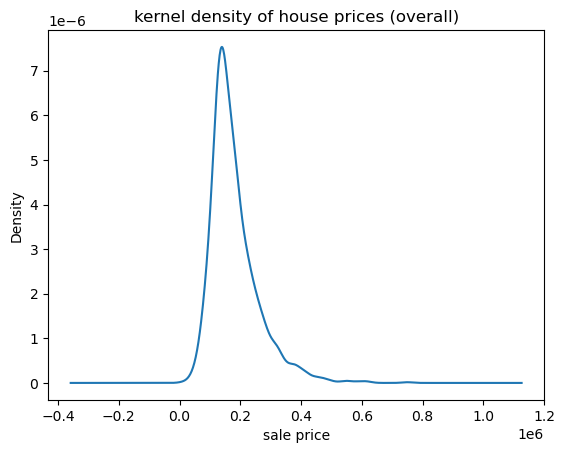

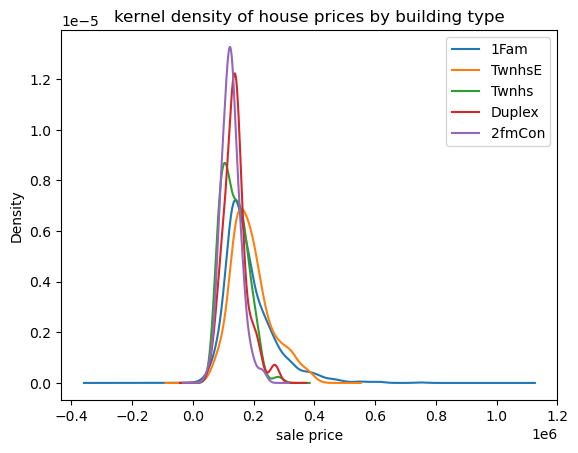

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [ ]:
# Q7

# overall kde for house prices
prices = df_ames["price"].dropna()

plt.figure()
prices.plot(kind="kde")
plt.xlabel("sale price")
plt.title("kernel density of house prices (overall)")
plt.show()

# kde by building type
plt.figure()
for bldg_type in df_ames["Bldg.Type"].dropna().unique():
    subset = df_ames.loc[df_ames["Bldg.Type"] == bldg_type, "price"].dropna()
    subset.plot(kind="kde", label=bldg_type)

plt.xlabel("sale price")
plt.title("kernel density of house prices by building type")
plt.legend()
plt.show()

# summary statistics by building type
price_summary = df_ames.groupby("Bldg.Type")["price"].describe()
print(price_summary)

From the density curves and summary stats, single-family homes and
end-unit townhouses generally have higher average sale prices and more spread in
their distributions. duplexes, 2famcon, and interior townhouses tend to cluster
at lower price ranges and show less overall variation.


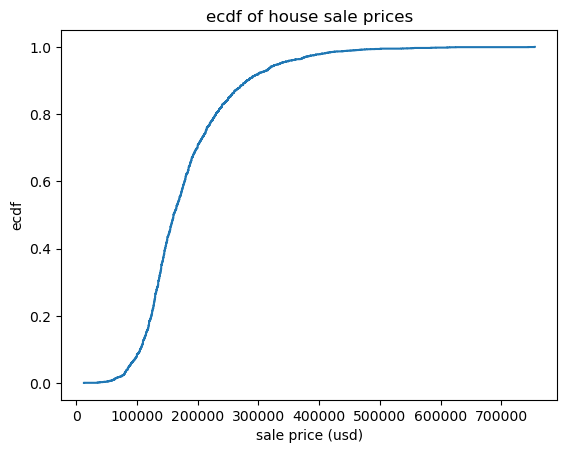

five-number summary:
{'min': 12789, '25%': 129500.0, '50%': 160000.0, '75%': 213500.0, 'max': 755000}


In [ ]:
# Q7

# remove missing prices and sort them
price = df_ames["price"].dropna()
price_sorted = np.sort(price.values)

# compute ecdf values
n = len(price_sorted)
ecdf_y = np.arange(1, n + 1) / n

# plot ecdf
plt.figure()
plt.step(price_sorted, ecdf_y, where="post")
plt.xlabel("sale price (usd)")
plt.ylabel("ecdf")
plt.title("ecdf of house sale prices")
plt.show()

# manually compute five-number summary
five_num = {
    "min": price.min(),
    "25%": price.quantile(0.25),
    "50%": price.median(),
    "75%": price.quantile(0.75),
    "max": price.max()
}

print("five-number summary:")
print(five_num)

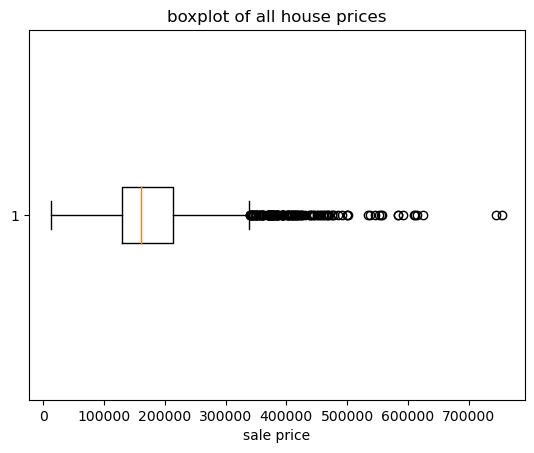

<Figure size 640x480 with 0 Axes>

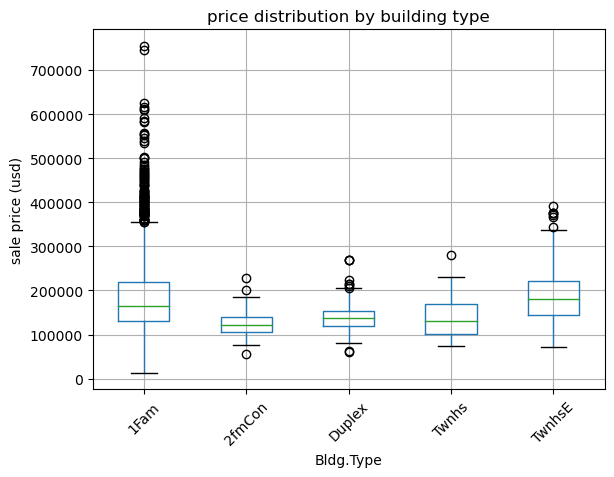

In [ ]:
#Q7

# boxplot of all prices (overall)
plt.figure()
plt.boxplot(df_ames["price"].dropna(), vert=False)
plt.title("boxplot of all house prices")
plt.xlabel("sale price")
plt.show()

# boxplot by building type (grouped)
plt.figure()
df_ames.boxplot(column="price", by="Bldg.Type", rot=45)
plt.ylabel("sale price (usd)")
plt.title("price distribution by building type")
plt.suptitle("")  # removes the automatic pandas title
plt.show()

Yes, there are outliers in the overall boxplot, shown by points that fall past the whiskers.
most of the outliers are on the high end, which makes sense because a few houses sell for way more than
the typical price. when splitting by building type, 1fam homes generally have higher prices and a wider
spread compared to other categories. overall, building type clearly affects both the level and the
variability of sale prices, and 1fam has the most extreme high-end outliers.

q1: 129500.0 q3: 213500.0
lower bound: 3500.0 upper bound: 339500.0
number of outliers: 137


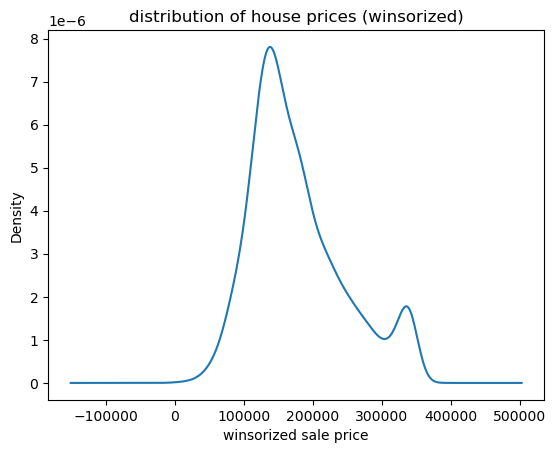

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: windsor, dtype: float64


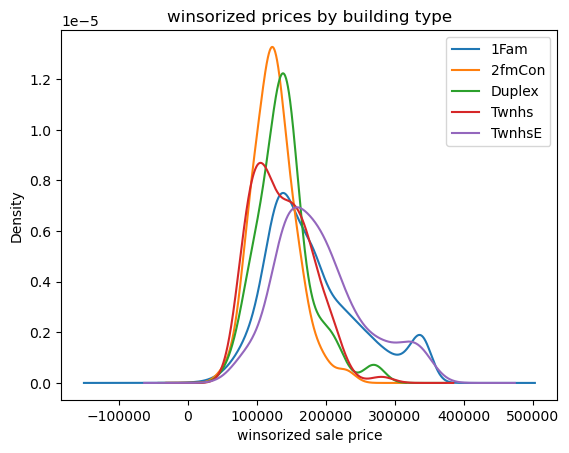

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  180417.359588  69177.514863  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  191349.420601  63715.987930  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  339500.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  339500.0  


In [ ]:
# Q7

# iqr method for outliers
Q1 = df_ames["price"].quantile(0.25)
Q3 = df_ames["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("q1:", Q1, "q3:", Q3)
print("lower bound:", lower_bound, "upper bound:", upper_bound)

# create outlier dummy variable (true if outside bounds)
df_ames["outlier"] = df_ames["price"].between(lower_bound, upper_bound, inclusive="both") == False
print("number of outliers:", df_ames["outlier"].sum())

# winsorize prices (cap values at the bounds)
df_ames["windsor"] = df_ames["price"].clip(lower=lower_bound, upper=upper_bound)

# kde plot of winsorized prices (overall)
plt.figure()
df_ames["windsor"].dropna().plot(kind="kde")
plt.title("distribution of house prices (winsorized)")
plt.xlabel("winsorized sale price")
plt.show()

print(df_ames["windsor"].describe())

# kde plot of winsorized prices by building type
plt.figure()
for bt, g in df_ames.groupby("Bldg.Type"):
    g["windsor"].dropna().plot(kind="kde", label=bt)

plt.title("winsorized prices by building type")
plt.xlabel("winsorized sale price")
plt.legend()
plt.show()

# describe table by building type (winsorized)
summary_by_type = df_ames.groupby("Bldg.Type")["windsor"].describe()
print(summary_by_type)


After winsorizing, the biggest prices get capped at the upper bound (and any super low ones
get lifted to the lower bound), so the distribution looks less extreme and the right tail is not as long.
the overall shape is still similar, but the spread is smaller because the outliers are not pulling it as much.
when looking by building type, the main ranking does not really change: 1fam and twnhe are still generally
higher, while duplex and 2fmcon tend to be cheaper. winsorizing mostly just makes comparisons easier since
a few extreme sales are not dominating the scale.